In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

1. Principal Component Analysis

 a. Applying PCA on CC dataset.

 b. Applying k-means algorithm on the PCA result and report your observation if the silhouette score
has improved or not?

 c. Performing Scaling+PCA+K-Means and report performance.


In [7]:
cc_dataset=pd.read_csv('CC.csv')
cc_dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
X = cc_dataset.iloc[:,1:]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X=pd.DataFrame(X)

In [9]:
pca = PCA(2)
x_pca = pca.fit_transform(X)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2, X.iloc[:,-1]], axis=1)
finaldf.head()

,0,1,16
0,-4326.383956,921.566884,12.0
1,4118.916676,-2432.846347,12.0
2,1497.907660,-1997.578692,12.0
3,1394.548556,-1488.743450,12.0
4,-3743.351874,757.342659,12.0


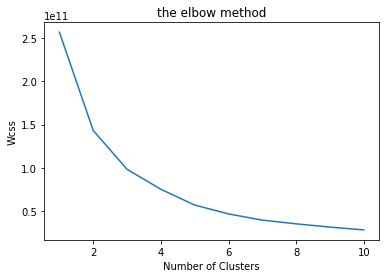

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(finaldf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [11]:
nclusters = 4
km = KMeans(n_clusters=nclusters)
km.fit(finaldf)

KMeans(n_clusters=4)

In [12]:
y_cluster_kmeans = km.predict(finaldf)

score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print(score)

0.5042107910615441


In [13]:
X = cc_dataset.iloc[:,1:]


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
  
X = imputer.transform(X)

print(X)
X=pd.DataFrame(X)

[[4.09007490e+01 8.18182000e-01 9.54000000e+01 ... 1.39509787e+02
  0.00000000e+00 1.20000000e+01]
 [3.20246742e+03 9.09091000e-01 0.00000000e+00 ... 1.07234022e+03
  2.22222000e-01 1.20000000e+01]
 [2.49514886e+03 1.00000000e+00 7.73170000e+02 ... 6.27284787e+02
  0.00000000e+00 1.20000000e+01]
 ...
 [2.33986730e+01 8.33333000e-01 1.44400000e+02 ... 8.24183690e+01
  2.50000000e-01 6.00000000e+00]
 [1.34575640e+01 8.33333000e-01 0.00000000e+00 ... 5.57556280e+01
  2.50000000e-01 6.00000000e+00]
 [3.72708075e+02 6.66667000e-01 1.09325000e+03 ... 8.82889560e+01
  0.00000000e+00 6.00000000e+00]]


In [14]:
scaler = StandardScaler()
scaler.fit(X)

x_scaler = scaler.transform(X)



pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2,cc_dataset[['TENURE']]],axis=1)
print(finaldf)

             0         1  TENURE
0    -1.682221 -1.076440      12
1    -1.138292  2.506528      12
2     0.969680 -0.383591      12
3    -0.873629  0.043142      12
4    -1.599434 -0.688561      12
...        ...       ...     ...
8945 -0.359631 -2.016150       6
8946 -0.564371 -1.639146       6
8947 -0.926205 -1.810788       6
8948 -2.336551 -0.657927       6
8949 -0.556420 -0.400464       6

[8950 rows x 3 columns]


In [15]:

nclusters = 4
km = KMeans(n_clusters=nclusters)
km.fit(finaldf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=4)

In [16]:
y_cluster_kmeans = km.predict(finaldf)

score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print(score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.43788715500608416


2. Use pd_speech_features.csv

  a. Performing Scaling

  b. Applying PCA (k=3)

  c. Using SVM to report performance

In [18]:
speech_df=pd.read_csv('pd_speech_features.csv')
speech_df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [19]:
x =speech_df.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(x)
speech_x_scaler = scaler.transform(x)

pca = PCA(3)
speech_x_pca = pca.fit_transform(speech_x_scaler)
speech_df2 = pd.DataFrame(data=speech_x_pca)
speech_finaldf = pd.concat([speech_df2,speech_df[['class']]],axis=1)
print(speech_finaldf)

             0         1          2  class
0   -10.052430  1.476819  -6.828358      1
1   -10.641066  1.590407  -6.811683      1
2   -13.520081 -1.243923  -6.794536      1
3    -9.142525  8.848870  15.300275      1
4    -6.758091  4.624221  15.645665      1
..         ...       ...        ...    ...
751  22.377449  6.470192   1.439468      0
752  13.503270  1.450491   9.344872      0
753   8.328507  2.392512  -0.911238      0
754   4.074595  5.417627  -0.847066      0
755   4.052809  6.076466  -2.022279      0

[756 rows x 4 columns]


In [31]:

clf = SVC(kernel='linear') 


x =speech_finaldf.iloc[:,:-1]
y =speech_finaldf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

accuracy_score(y_test, y_pred)
print("svm accuracy =", accuracy_score(y_test, y_pred))

svm accuracy = 0.768


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.20      0.33        69
           1       0.76      0.98      0.86       181

    accuracy                           0.77       250
   macro avg       0.79      0.59      0.59       250
weighted avg       0.78      0.77      0.71       250



3. Applying Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2.

In [24]:
iris_df = pd.read_csv("Iris.csv")

iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(iris_df.iloc[:,:-1].values)

In [26]:
class_le = LabelEncoder()
y = class_le.fit_transform(iris_df['Species'].values)

In [27]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)

In [28]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-10.036763,-0.451330,0
1,-9.172930,-1.477234,0
2,-9.480989,-0.979693,0
3,-8.818119,-1.408602,0
4,-9.960200,-0.112546,0


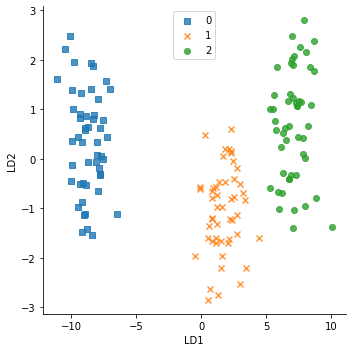

In [29]:
markers = ['s', 'x', 'o']
colors = ['r', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()

Question 4: Briefly identify the difference between PCA and LDA

PCA and LDA are two popular dimensionality reduction methods for data with many input features. Both LDA and PCA are linear transformation algorithms, but LDA is supervised whereas PCA is unsupervised, and PCA does not take class labels into account. By locating the largest variance, PCA reduces the number of dimensions in high-dimensional data. The goal of LDA is to find the best feature subspace for class separation.

Both approaches rely on dissecting matrices of eigenvalues and eigenvectors, but the core learning approach is significantly different. LDA is supervised, whereas PCA is not. PCA reduces dimensions by investigating the relationships between different features. This is accomplished by creating a new subspace by constructing orthogonal axes - or principle components - with the highest variance direction. PCA generates components based on the direction in which the data has the most variation - for example, the direction in which the data is the most spread out. This component is known as principals and eigenvectors, and it represents a subset of the data that contains the majority of the information - or variance - in our data. LDA, on the other hand, does nearly the same thing, but it includes a "pre-processing" step that computes mean vectors from class labels prior to extracting eigenvalues. 

PCA: To create the covariance matrix, take the joint covariance - or correlation in some cases - between each pair in the supplied vector.

LDA: For each class label, compute the d-dimensional mean vector, Make a scatter matrix for each class as well as a scatter matrix between classes.





